In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG

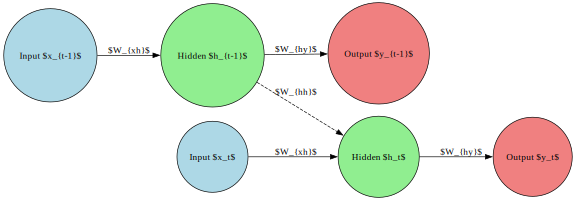

In [2]:
display(SVG("rnn_architecture.svg"))

In [3]:
# Dimensions
n_x = 2   # Input size
n_h = 5   # Hidden state size
n_y = 2   # Output size

In [4]:
# Weights and biases initialization
np.random.seed(42)  # For reproducibility

W_xh = np.random.randn(n_h, n_x) * 0.01  # Input to hidden weights
W_hh = np.random.randn(n_h, n_h) * 0.01  # Hidden to hidden weights
W_hy = np.random.randn(n_y, n_h) * 0.01  # Hidden to output weights

b_h = np.zeros((n_h, 1))  # Hidden bias
b_y = np.zeros((n_y, 1))  # Output bias


In [5]:
def forward_pass(inputs):
    """
    inputs: list of input vectors (numpy arrays) of shape (n_x, 1)
    Returns:
    - ys: dictionary of outputs at each time step
    - hs: dictionary of hidden states at each time step
    """
    h_prev = np.zeros((n_h, 1))  # Initialize previous hidden state
    hs = {}  # Store hidden states
    ys = {}  # Store outputs

    for t, x_t in enumerate(inputs):
        # Hidden state computation
        h_t = np.tanh(np.dot(W_xh, x_t) + np.dot(W_hh, h_prev) + b_h)
        # Output computation
        y_t = np.dot(W_hy, h_t) + b_y
        # Store the hidden state and output
        hs[t] = h_t
        ys[t] = y_t
        # Update previous hidden state
        h_prev = h_t

    return ys, hs


In [6]:
def compute_loss(outputs, targets):
    """
    outputs: dictionary of outputs from forward_pass
    targets: list of target vectors (numpy arrays) of shape (n_y, 1)
    Returns:
    - loss: scalar value representing the total loss
    """
    loss = 0.0
    for t in range(len(targets)):
        y_pred = outputs[t]
        y_true = targets[t]
        loss += np.sum((y_pred - y_true) ** 2)
    loss *= 0.5  # For MSE
    return loss


In [7]:
def backward_pass(inputs, targets, outputs, hs):
    """
    inputs: list of input vectors
    targets: list of target vectors
    outputs: outputs from forward_pass
    hs: hidden states from forward_pass
    Returns:
    - Gradients for all parameters
    """
    # Initialize gradients
    dW_xh = np.zeros_like(W_xh)
    dW_hh = np.zeros_like(W_hh)
    dW_hy = np.zeros_like(W_hy)
    db_h = np.zeros_like(b_h)
    db_y = np.zeros_like(b_y)

    dh_next = np.zeros((n_h, 1))

    for t in reversed(range(len(inputs))):
        dy = outputs[t] - targets[t]  # Gradient of output
        dW_hy += np.dot(dy, hs[t].T)
        db_y += dy

        dh = np.dot(W_hy.T, dy) + dh_next  # Backprop into h
        dh_raw = (1 - hs[t] ** 2) * dh  # Backprop through tanh activation
        db_h += dh_raw
        dW_xh += np.dot(dh_raw, inputs[t].T)
        if t != 0:
            dW_hh += np.dot(dh_raw, hs[t - 1].T)
        else:
            dW_hh += np.dot(dh_raw, np.zeros_like(hs[t]).T)
        dh_next = np.dot(W_hh.T, dh_raw)

    # Clip gradients to prevent exploding gradients
    for dparam in [dW_xh, dW_hh, dW_hy, db_h, db_y]:
        np.clip(dparam, -5, 5, out=dparam)

    return dW_xh, dW_hh, dW_hy, db_h, db_y


In [8]:
def update_parameters(params, grads, learning_rate):
    """
    params: tuple of parameters (W_xh, W_hh, W_hy, b_h, b_y)
    grads: tuple of gradients (dW_xh, dW_hh, dW_hy, db_h, db_y)
    """
    for param, dparam in zip(params, grads):
        param -= learning_rate * dparam


In [9]:
# Example data (simple sequence)
sequence_length = 10
inputs = [np.random.randn(n_x, 1) for _ in range(sequence_length)]  # Input sequence
targets = [np.random.randn(n_y, 1) for _ in range(sequence_length)]  # Target sequence

learning_rate = 0.01
num_epochs = 600

# Parameters tuple
params = (W_xh, W_hh, W_hy, b_h, b_y)

# Initialize lists to store losses and predictions
losses = []
predictions = []

for epoch in range(num_epochs):
    # Forward pass
    outputs, hs = forward_pass(inputs)
    
    # Compute loss
    loss = compute_loss(outputs, targets)
    losses.append(loss)
    
    # Backward pass
    grads = backward_pass(inputs, targets, outputs, hs)
    
    # Update parameters
    update_parameters(params, grads, learning_rate)
    
    # Store predictions at the end of training
    if epoch == num_epochs - 1:
        predictions = [outputs[t] for t in range(sequence_length)]
    
    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}")


Epoch 10/600, Loss: 11.0951
Epoch 20/600, Loss: 11.0113
Epoch 30/600, Loss: 10.9913
Epoch 40/600, Loss: 10.9636
Epoch 50/600, Loss: 10.8963
Epoch 60/600, Loss: 10.7329
Epoch 70/600, Loss: 10.3759
Epoch 80/600, Loss: 9.7666
Epoch 90/600, Loss: 9.1078
Epoch 100/600, Loss: 8.7168
Epoch 110/600, Loss: 8.5660
Epoch 120/600, Loss: 8.5041
Epoch 130/600, Loss: 8.4652
Epoch 140/600, Loss: 8.4297
Epoch 150/600, Loss: 8.3900
Epoch 160/600, Loss: 8.3405
Epoch 170/600, Loss: 8.2756
Epoch 180/600, Loss: 8.1906
Epoch 190/600, Loss: 8.0840
Epoch 200/600, Loss: 7.9596
Epoch 210/600, Loss: 7.8241
Epoch 220/600, Loss: 7.6836
Epoch 230/600, Loss: 7.5392
Epoch 240/600, Loss: 7.3882
Epoch 250/600, Loss: 7.2261
Epoch 260/600, Loss: 7.0481
Epoch 270/600, Loss: 6.8487
Epoch 280/600, Loss: 6.6198
Epoch 290/600, Loss: 6.3483
Epoch 300/600, Loss: 6.0142
Epoch 310/600, Loss: 5.5904
Epoch 320/600, Loss: 5.0572
Epoch 330/600, Loss: 4.4450
Epoch 340/600, Loss: 3.8454
Epoch 350/600, Loss: 3.3085
Epoch 360/600, Loss: 2

In [10]:
# Convert targets and predictions to numpy arrays for plotting
target_values = np.array([target[0][0] for target in targets])
prediction_values = np.array([prediction[0][0] for prediction in predictions])
input_values = np.array([input_[0][0] for input_ in inputs])


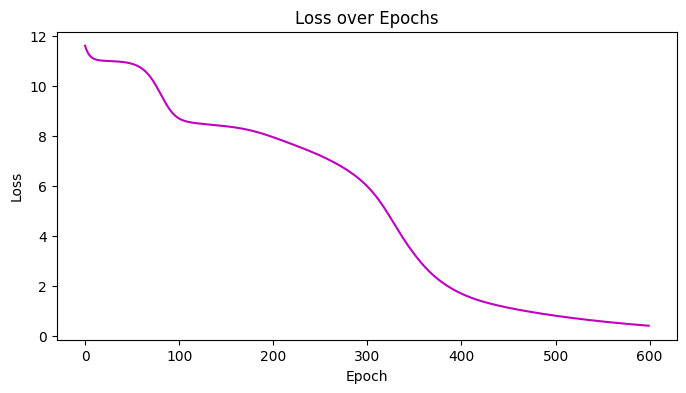

In [11]:
# Plot loss over epochs
plt.figure(figsize=(8, 4))
plt.plot(range(num_epochs), losses, 'm-')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

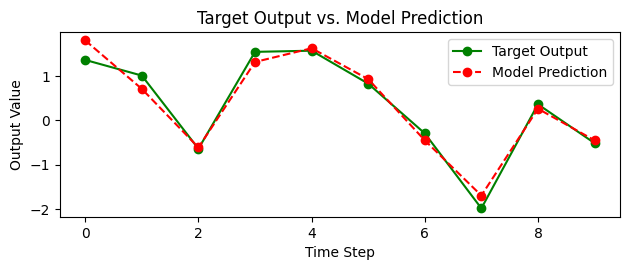

In [11]:
# Plot target vs. prediction
plt.subplot(2, 1, 2)
plt.plot(range(sequence_length), target_values, 'go-', label='Target Output')
plt.plot(range(sequence_length), prediction_values, 'ro--', label='Model Prediction')
plt.title('Target Output vs. Model Prediction')
plt.xlabel('Time Step')
plt.ylabel('Output Value')
plt.legend()

plt.tight_layout()
plt.show()
